## Comparing the clean and incremental build time of a system on its different configurations

In [20]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_04/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,40.35,1938928,50.17,43.95,40.52
1,00002,20.18,1488112,23.18,20.91,19.54
2,00003,19.90,1554512,23.95,21.09,19.37
3,00004,34.58,1720304,42.99,36.29,32.98
4,00005,79.49,3094224,93.26,79.50,73.48
5,00006,71.02,2879792,86.33,73.39,69.71
6,00007,19.95,1440352,23.26,20.48,18.91
7,00008,36.69,1866608,45.41,39.55,36.23
8,00009,43.24,2046072,52.86,46.01,42.21
9,00010,39.14,2278824,45.18,39.27,36.16


In [21]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4 = df4.sort_index()
df4 

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
0,00001,40.35,40.52,-0.43
1,00002,20.18,19.54,3.15
2,00003,19.90,19.37,2.67
3,00004,34.58,32.98,4.63
4,00005,79.49,73.48,7.57
5,00006,71.02,69.71,1.84
6,00007,19.95,18.91,5.22
7,00008,36.69,36.23,1.25
8,00009,43.24,42.21,2.36
9,00010,39.14,36.16,7.60


In [22]:
# Extracting only the first and last 5 extreme differences in build time
#df5 = df4[: 5]
#df6 = df4[-5:]
#df7 = df5.append(df6)
#df7

df5 = df4.set_index(["Branch"])
df5

,Clean Build Time,Min Inc. Build Time,Time Diff. %
Branch,,,
00001,40.35,40.52,-0.43
00002,20.18,19.54,3.15
00003,19.90,19.37,2.67
00004,34.58,32.98,4.63
00005,79.49,73.48,7.57
00006,71.02,69.71,1.84
00007,19.95,18.91,5.22
00008,36.69,36.23,1.25
00009,43.24,42.21,2.36


<AxesSubplot:xlabel='Configurations', ylabel='Difference of build time'>

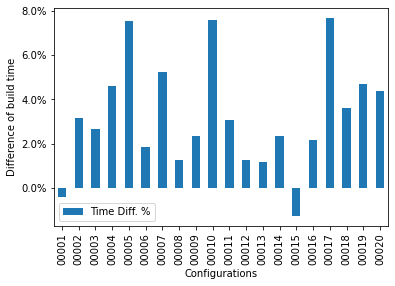

In [23]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


ib_plot = df5[["Time Diff. %"]].plot(kind='bar')


ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Difference of build time")

ib_plot.yaxis.set_major_formatter(mtick.PercentFormatter())
ib_plot.xaxis.tick_bottom()

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

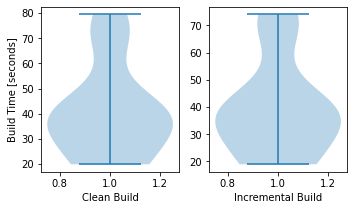

In [27]:
# The clean and incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = df5['Clean Build Time']
labels1 = 'Clean Build'
all_data2 = df5['Min Inc. Build Time']
labels2 = 'Incremental Build'

     
plt.rc('font', size=10)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("Build Time [seconds]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)


fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig04.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

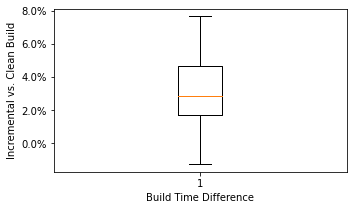

In [34]:
# The clean and incremental build time summaried for all configurations in %
import matplotlib.pyplot as plt
 
all_data1 = df5['Time Diff. %']
labels1 = "Build Time Difference"
     
plt.rc('font', size=10)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

#ax1.violinplot(all_data1)
ax1.boxplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("Incremental vs. Clean Build")

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig05.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()